##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [2]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Number of unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Number of classes: 10


In [3]:
# Define class names
class_names = [    
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]

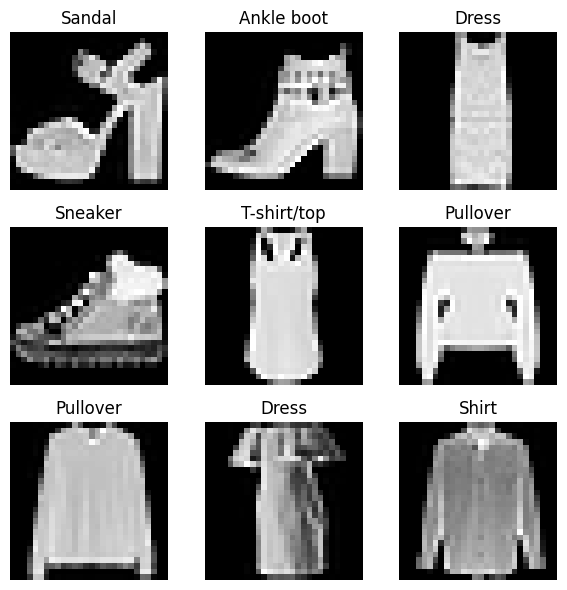

In [4]:
# Plot a 3x3 grid of random images from the dataset with their labels
import matplotlib.pyplot as plt
import numpy as np
import random

plt.figure(figsize=(6, 6))

for i in range(9):
    idx = random.randint(0, len(x_train) - 1)

    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[idx].squeeze(), cmap="gray")
    plt.title(class_names[y_train[idx]])
    plt.axis("off")

plt.tight_layout()
plt.show()

T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


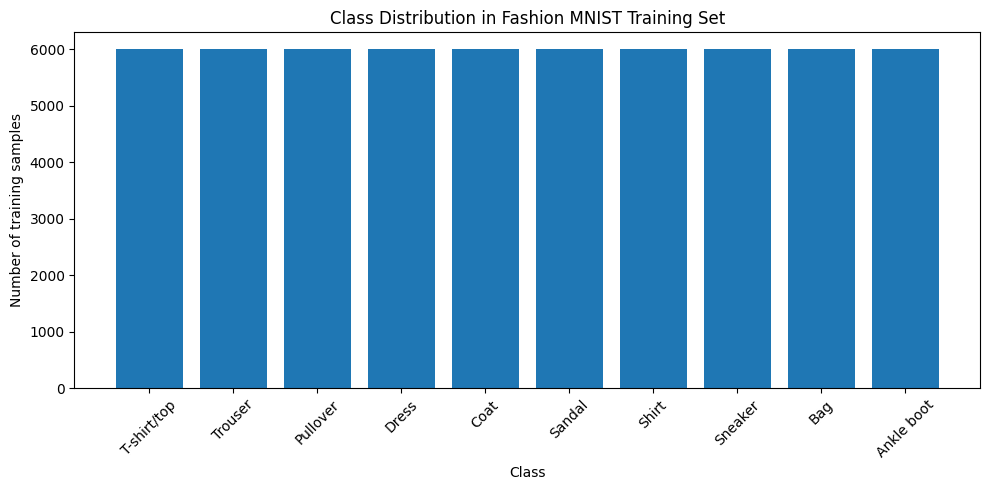

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Count occurrences of each class in the training set
class_counts = np.bincount(y_train)

for i, count in enumerate(class_counts):
    print(f"{class_names[i]}: {count}")

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts)
plt.xlabel("Class")
plt.ylabel("Number of training samples")
plt.title("Class Distribution in Fashion MNIST Training Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [8]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values for x_train and x_test
x_train = x_train / 255.0
x_test  = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8042 - loss: 0.5434 - val_accuracy: 0.8604 - val_loss: 0.3750
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8722 - loss: 0.3528 - val_accuracy: 0.8831 - val_loss: 0.3209
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8891 - loss: 0.3074 - val_accuracy: 0.8923 - val_loss: 0.2939
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8988 - loss: 0.2746 - val_accuracy: 0.8999 - val_loss: 0.2767
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9090 - loss: 0.2514 - val_accuracy: 0.8971 - val_loss: 0.2741
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9139 - loss: 0.2330 - val_accuracy: 0.9073 - val_loss: 0.2521
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9207 - loss: 0.2145 - val_accuracy: 0.9031 - val_loss: 0.2595
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9264 - loss: 0.1993 - val_accuracy: 0.